# Image Processing Using Python (scikit-image)

A digital image is an array,or a matrix, of square pixels(picture elemets) arranged in columns and rows; in other words, a 2-D matrix.

In [1]:
#import module from skimage to read and write image
from skimage import io
#assign our image to a variable for easier acess.
img = io.imread("jonathan-kemper-IZcbhj6tbos-unsplash.jpg")
#downloaded image from unsplash

In [2]:
#display image
io.imshow(img)
io.show()

<Figure size 640x480 with 1 Axes>

In [3]:
type(img)

numpy.ndarray

This now shows that our image is of type of numpy array

In [4]:
img.shape

(4000, 6000, 3)

here the output show the dimension of image 4000X6000 (col x rows) and 3 denotes that the image in multichannel i.e. RGB-3

In [30]:
img.size
#4000*6000

72000000

In [6]:
#for easier acess to show image later define a functoin using above commands
def show(img): #take image as parameter
    io.imshow(img)

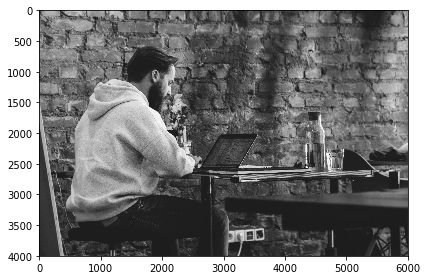

In [7]:
#let's change our RGB image to Grayscale
from skimage import color
gray_image = color.rgb2gray(img)

show(gray_image)

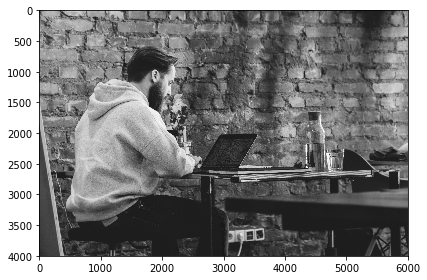

In [8]:
#not only grayscale we can obtain particualar image from RGB combination too
#lets obtain red color from image
red = img[:,:,0]
show(red)

though from naked eyes we are not able to see the difference between grayscale and this one but yes there is.
lets try with blue and green too

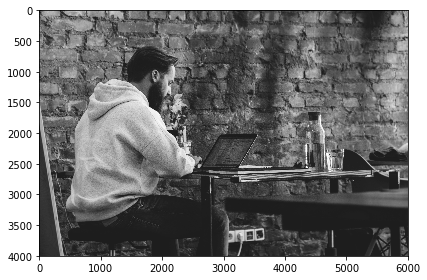

In [9]:
green = img[:,:,1]

show(green)

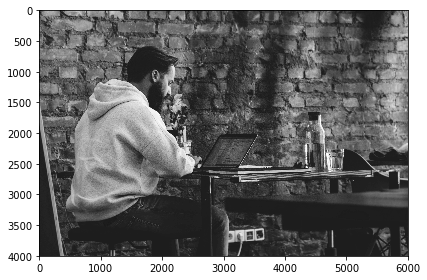

In [10]:
blue = img[:,:,2]
show(blue)

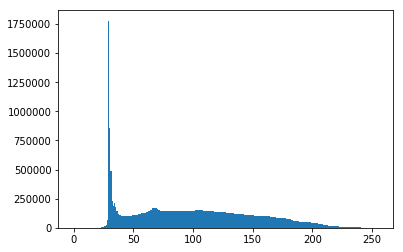

In [11]:
#histogram of images
import matplotlib.pyplot as plt
plt.hist(red.ravel(),bins=256)
plt.show()

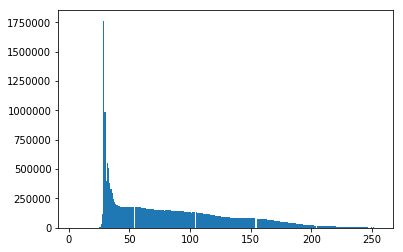

In [12]:
plt.hist(blue.ravel(),bins=256)
plt.show()

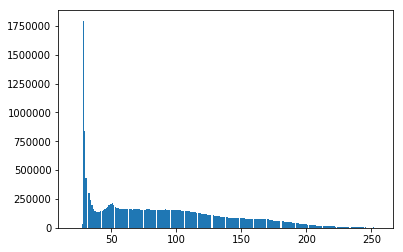

In [13]:
plt.hist(green.ravel(),bins=256)
plt.show()

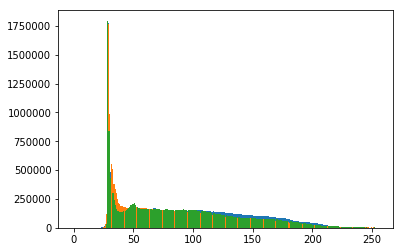

In [14]:
plt.hist(red.ravel(),bins=256)
plt.hist(blue.ravel(),bins=256)
plt.hist(green.ravel(),bins=256)
plt.show()

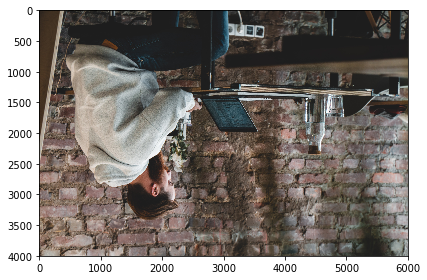

In [15]:
#flipping image
import numpy as np
#flip vertically using flipud function
ver_flip = np.flipud(img)
show(ver_flip)

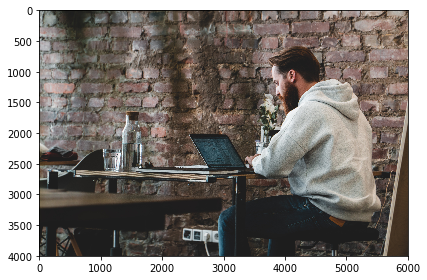

In [16]:
#horizontal flip
hor_flip = np.fliplr(img) #same as reversing the linkedlist here just every row in reversed
show(hor_flip)

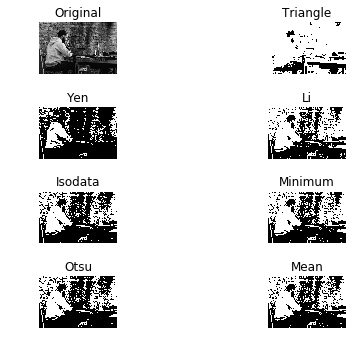

In [17]:
from skimage.filters import try_all_threshold
fig,ax = try_all_threshold(gray_image, verbose=False)

In [18]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(gray_image)
binary_global = gray_image >thresh

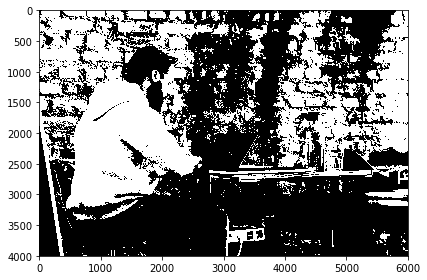

In [19]:
show(binary_global)

/home/samsepi0l/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


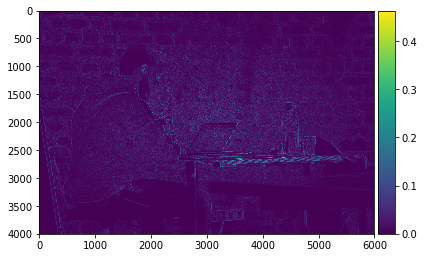

In [20]:
#edge detection
from skimage.filters import sobel
edges = sobel(gray_image)
show(edges)

In [21]:
plot_camparison = (img, edges, "compare")

In [22]:
plt.show(plot_camparison)

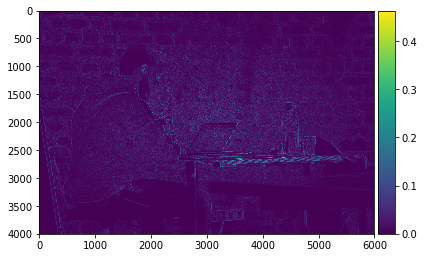

In [23]:
show(edges)

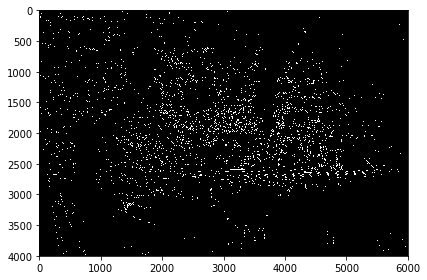

In [24]:
from skimage.feature import canny
canny_edge = canny(gray_image)
show(canny_edge)

all the corner extractes from our sample image

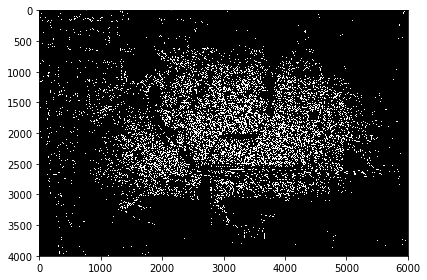

In [25]:
canny_edge_05 = canny(gray_image, sigma=0.5)
show(canny_edge_05)

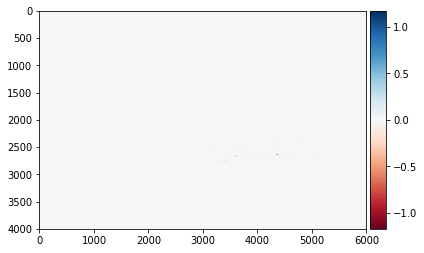

In [26]:
from skimage.feature import corner_harris
measure_image = corner_harris(gray_image)
show(measure_image)

In [27]:
from skimage.feature import corner_peaks
cords = corner_peaks(corner_harris(gray_image),min_distance=5)
print("a total of",len(cords),"corners detected")

('a total of', 92, 'corners detected')


In [28]:
def show_image_with_detected_corners(image,cords,title="title"):
    plt.imshow(image, interpolation='nearesr', cmap='gray')
    plt.title(title)
    plt.plot(cords[:,1],cords[:,0],'+r',marksize=15)
    plt.axis('off')
    plt.show()

ValueError: Illegal interpolation string

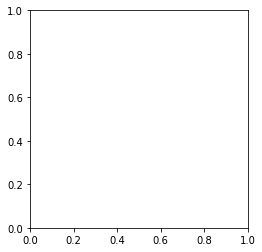

In [29]:
show_image_with_detected_corners(gray_image,cords)

I am not sure of the error but will try to find and resolve asap..